In [2]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import skytools as st 
import camb 
import sys

In [28]:
cosmo_params = camb.read_ini("/global/cfs/cdirs/sobs/delensing/official/sim_cls/cosmo2017_10K_acc3_params.ini")

In [29]:
cosmo_params.WantTensors = True
cosmo_params.max_l_tensor = 2000
cosmo_params.accurate_BB = True
cosmo_params.k_eta_max_tensor = 15000.0000
cosmo_params.InitPower.r = 1.

In [4]:
plk_cls = np.loadtxt('/global/cfs/cdirs/sobs/delensing/official/sim_cls/cosmo2017_10K_acc3_lensedCls.dat')

Text(0.5, 1.0, 'Planck 2017 Lensed TT Power Spectrum')

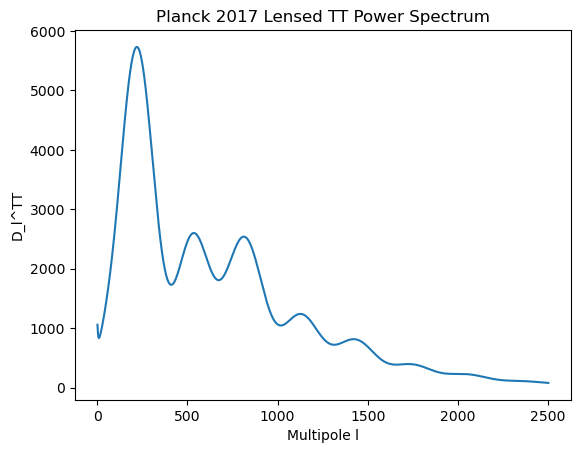

In [8]:
plt.plot(plk_cls[:2500,0], plk_cls[:2500,1])
plt.xlabel('Multipole l')
plt.ylabel('D_l^TT')
plt.title('Planck 2017 Lensed TT Power Spectrum')

In [30]:
results = camb.get_results(cosmo_params)

In [31]:
Cls_camb = results.get_cmb_power_spectra(CMB_unit='muK')

In [32]:
lensedscalar = Cls_camb['lensed_scalar']

In [16]:
plk_cls.shape

(8249, 5)

In [15]:
lensedscalar.shape

(9901, 4)

Text(0.5, 1.0, 'Planck 2017 Lensed TT Power Spectrum')

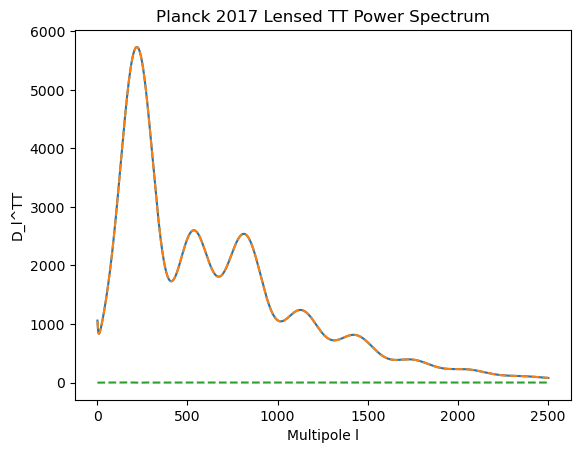

In [33]:
plt.plot(plk_cls[:2500,0], plk_cls[:2500,1])
plt.plot(plk_cls[:2500,0],lensedscalar[2:2502,0], linestyle='dashed')
plt.plot(plk_cls[:2500,0],lensedscalar[2:2502,0] - plk_cls[:2500,1], linestyle='dashed')
plt.xlabel('Multipole l')
plt.ylabel('D_l^TT')
plt.title('Planck 2017 Lensed TT Power Spectrum')

Text(0.5, 1.0, 'Planck 2017 Lensed EE Power Spectrum')

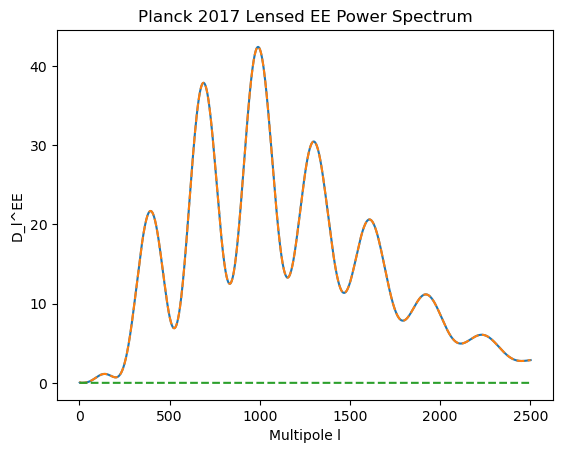

In [34]:
plt.plot(plk_cls[:2500,0], plk_cls[:2500,2])
plt.plot(plk_cls[:2500,0],lensedscalar[2:2502,1], linestyle='dashed')
plt.plot(plk_cls[:2500,0],lensedscalar[2:2502,1] - plk_cls[:2500,2], linestyle='dashed')
plt.xlabel('Multipole l')
plt.ylabel('D_l^EE')
plt.title('Planck 2017 Lensed EE Power Spectrum')

In [35]:
tensor = Cls_camb['tensor']

Text(0.5, 1.0, 'Planck 2017 Lensed BB Power Spectrum')

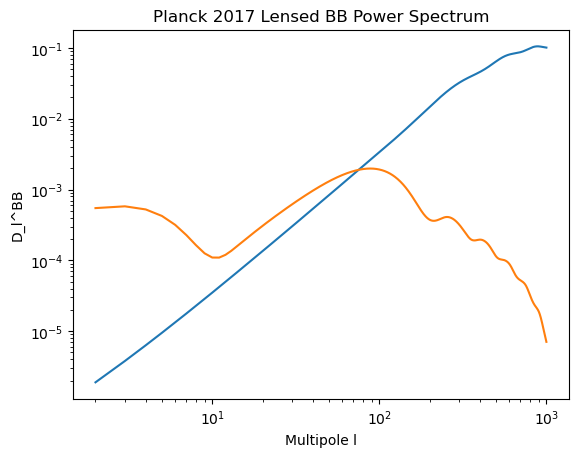

In [37]:
plt.loglog(plk_cls[:1000,0], plk_cls[:1000,3])
plt.loglog(plk_cls[:1000,0],tensor[2:1002,2]*3e-2)
# plt.plot(plk_cls[:2500,0],lensedscalar[2:2502,1] - plk_cls[:2500,2], linestyle='dashed')
plt.xlabel('Multipole l')
plt.ylabel('D_l^BB')
plt.title('Planck 2017 Lensed BB Power Spectrum')

In [39]:
Cl_tensor = np.zeros(plk_cls.shape)
Cl_tensor[:,0] = plk_cls[:,0]
Cl_tensor[:1000,1] = tensor[2:1002,0]
Cl_tensor[:1000,2] = tensor[2:1002,1]
Cl_tensor[:1000,3] = tensor[2:1002,2]
Cl_tensor[:1000,4] = tensor[2:1002,3]


In [40]:
np.savetxt('../resources/cosmo2017_10K_acc3_camb_tensorCls.dat', Cl_tensor)

In [41]:
import read_cmb_spectra as cw

In [42]:
tens_read = cw.get_tensor(lmax=300, r=1e-2)

Text(0.5, 1.0, 'Planck 2017 Lensed BB Power Spectrum')

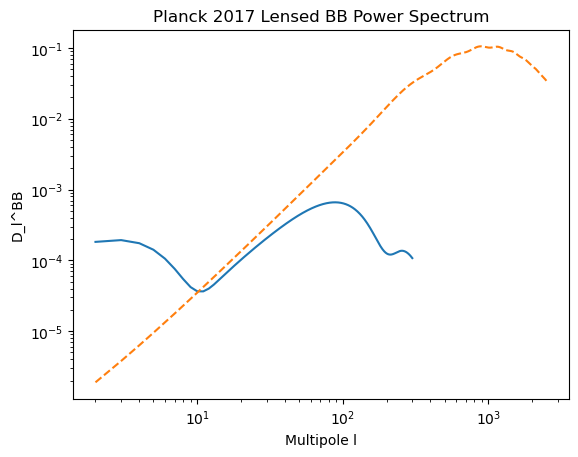

In [44]:
ells = np.arange(300+1)
plt.loglog(ells[2:], tens_read[2:,2], label='From read_cmb_spectra')
plt.plot(plk_cls[:2500,0],plk_cls[:2500,3], linestyle='dashed')
plt.xlabel('Multipole l')
plt.ylabel('D_l^BB')
plt.title('Planck 2017 Lensed BB Power Spectrum')

In [57]:
lensed_alms = []
for i in range(3):
    lensed_alms.append(hp.read_alm('/global/cfs/cdirs/sobs/v4_sims/mbs/cmb/fullskyLensedUnabberatedCMB_alm_set00_00000.fits', hdu=i+1))

In [59]:
lensed_alms = np.array(lensed_alms).astype(np.complex128)
lensed_alms.shape

(3, 13012651)

In [60]:
Cls_lensed = hp.alm2cl(lensed_alms, nspec=3)

In [62]:
ALM = hp.Alm()
lmax = ALM.getlmax(lensed_alms.shape[1])

Text(0.5, 1.0, 'Planck 2017 Lensed EE Power Spectrum')

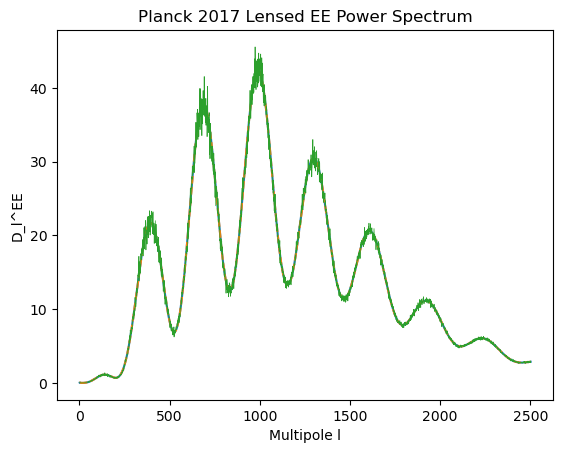

In [64]:
ells = np.arange(lmax+1)
Dellfactor = ells * (ells + 1) / (2.0 * np.pi)
plt.plot(plk_cls[:2500,0], plk_cls[:2500,2])
plt.plot(plk_cls[:2500,0],lensedscalar[2:2502,1], linestyle='dashed')
plt.plot(ells[2:2502], (Dellfactor*Cls_lensed[1])[2:2502], linestyle='-', lw=0.5)
plt.xlabel('Multipole l')
plt.ylabel('D_l^EE')
plt.title('Planck 2017 Lensed EE Power Spectrum')

Text(0.5, 1.0, 'Planck 2017 Lensed BB Power Spectrum')

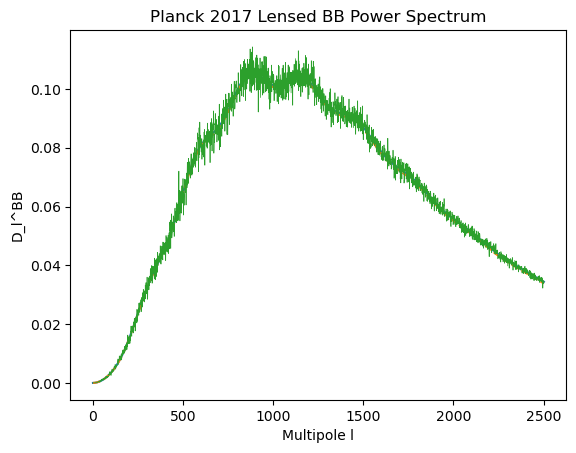

In [65]:
ells = np.arange(lmax+1)
Dellfactor = ells * (ells + 1) / (2.0 * np.pi)
plt.plot(plk_cls[:2500,0], plk_cls[:2500,3])
plt.plot(plk_cls[:2500,0],lensedscalar[2:2502,2], linestyle='dashed')
plt.plot(ells[2:2502], (Dellfactor*Cls_lensed[2])[2:2502], linestyle='-', lw=0.5)
plt.xlabel('Multipole l')
plt.ylabel('D_l^BB')
plt.title('Planck 2017 Lensed BB Power Spectrum')

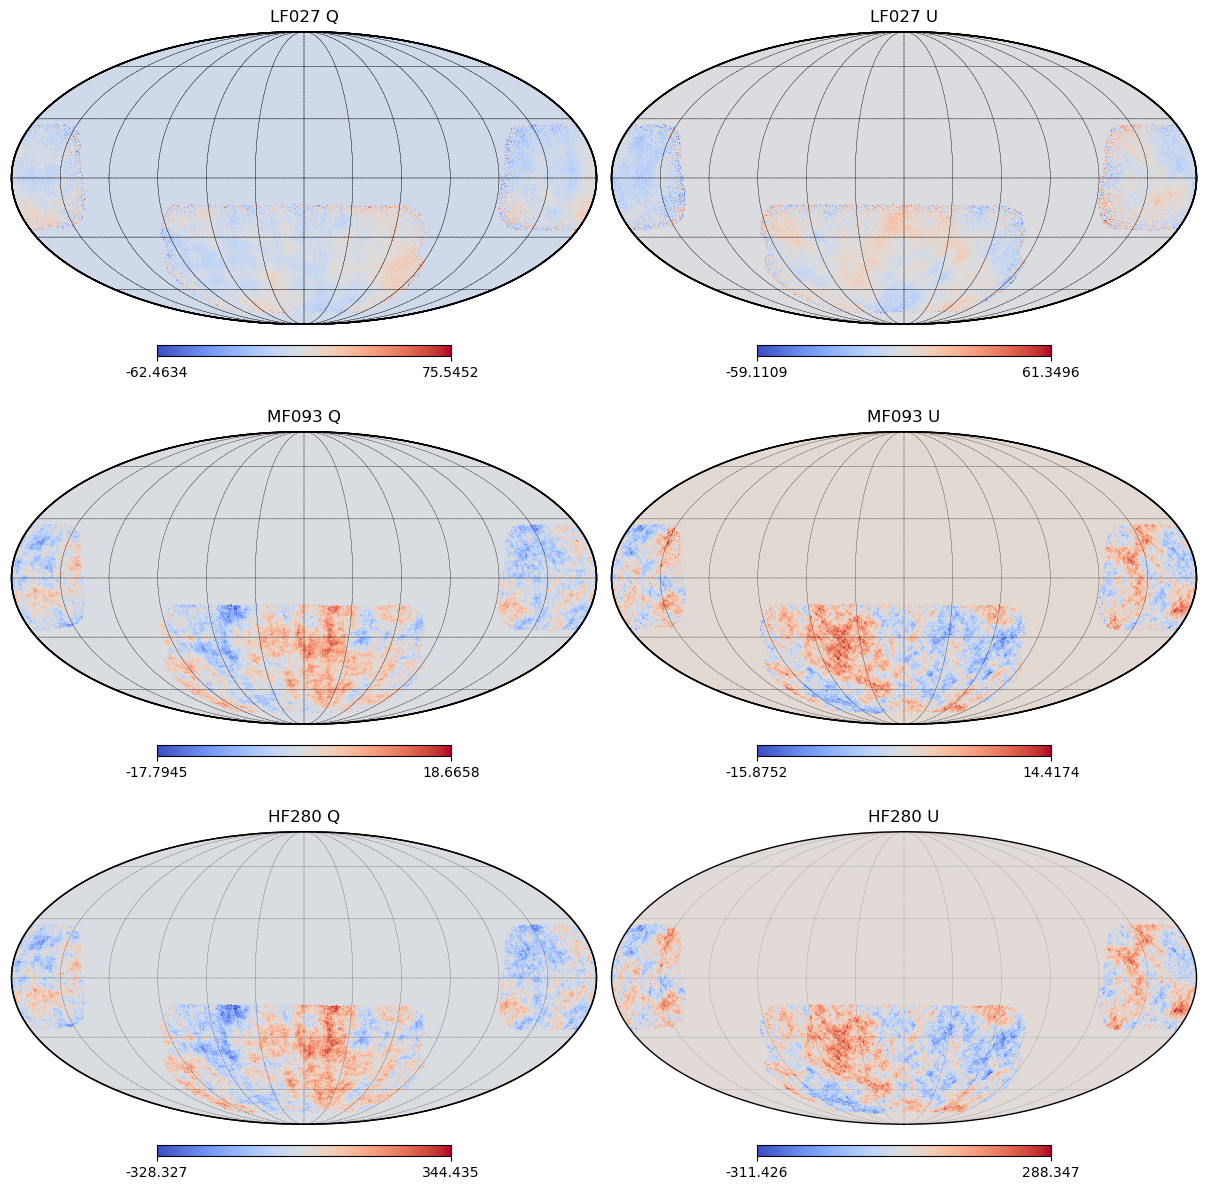

In [8]:
channels = ['LF027', 'MF093', 'HF280']
fig = plt.figure(figsize=(12, 12))

for i, channel in enumerate(channels):
    filename = f'../output/AL1.00_baseline_pessimistic/sobs_coadd_{channel}_AL1.00_mc000_nside0512.fits'
    maps = hp.read_map(filename, field=[0, 1, 2])
    
    hp.mollview(maps[1], title=f'{channel} Q', sub=(3, 2, 2*i+1), cmap='coolwarm')
    hp.graticule(lw=0.2, ls='--', alpha=0.5)
    hp.mollview(maps[2], title=f'{channel} U', sub=(3, 2, 2*i+2), cmap='coolwarm')
    hp.graticule(lw=0.2, ls='--', alpha=0.5)
    

# plt.tight_layout()